# **K Medoid Algorithm**

K Medoid is a Clustering Algorithm in Machine Learning that uses Medoids (i.e. Actual Objects in a Cluster) to represent the Cluster.

For using this library in Python this comes under Scikit Learn Extra Library.

This function operates on an given set of medoids and updates it inplace.

## Parameters:	
**C – The cost matrix**, where the cost in K-Medoids algorithm is given as – The dissimilarity of the medoid(Ci) and object(Pi) is calculated by using E = |Pi - Ci|
<br>
**Medoids** – The vector of medoid indexes. <br>The contents of medoids serve as the initial guess and will be overrided by the results.

## K Medoid Clustering Process
<ol>
  <li>Initialize: select k random points out of the n data points as the medoids.</li>
  <li>Associate each data point to the closest medoid by using any common distance metric methods.</li>
  <li>While the cost decreases:<br>
        For each medoid m, for each data o point which is not a medoid:
    <ol>
      <li>Swap m and o, associate each data point to the closest medoid, recompute the cost.</li>
      <li>If the total cost is more than that in the previous step, undo the swap.</li>
    </ol>
  </li>
</ol>  


In this file , we will showcase how a basic K Medoid Algorithm works in Python , on a randomly created Dataset.

Installing the scikit extra library because it isnt inbuilt

In [8]:
!pip install scikit-learn-extra 

## Importing Libraries

In [9]:
import matplotlib.pyplot as plt #Used for plotting graphs
from sklearn.datasets import make_blobs #Used for creating random dataset
from sklearn_extra.cluster import KMedoids #KMedoid is provided under Scikit-Learn Extra
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import numpy as np 
import pandas as pd

## Generating Data

In [21]:
data, clusters = make_blobs(
    n_samples=1000, centers=7, cluster_std=0.4, random_state=0
)

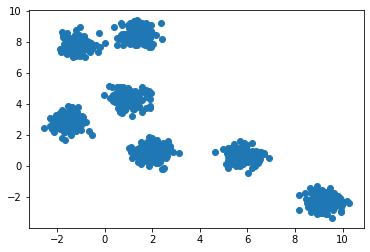

In [22]:
# Originally created plot with data
plt.scatter(data[:,0], data[:,1])
plt.show()

## Model Creation

In [23]:
# Creating KMedoids Model
Km_model = KMedoids(n_clusters=5) # n_clusters means the number of clusters to form as well as the number of medoids to generate.

In [24]:
Km_model.fit(data) #Fitting the data

KMedoids(n_clusters=5)

In [25]:
pred = Km_model.predict(data) #predicting on our randomly created dataset

In [26]:
labels_KMed = Km_model.labels_ #storing labels to check accuracy of model

## Plotting our observations

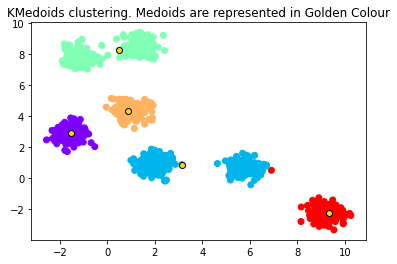

In [27]:
# Viewing our Prediction using Plots
plt.scatter(data[:, 0], data[:, 1], c = pred , cmap='rainbow')
plt.plot(
    Km_model.cluster_centers_[:, 0],
    Km_model.cluster_centers_[:, 1],
    "o",
    markerfacecolor="gold",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in Golden Colour")
plt.show()

In [28]:
Km_model.cluster_centers_ #points which were selected for Medoids in our clustering data

array([[-1.54935722,  2.91732824],
       [ 3.13375714,  0.86809379],
       [ 0.48931861,  8.2600726 ],
       [ 0.85164907,  4.32625346],
       [ 9.31521808, -2.27760445]])

## Accuracy of K Medoid Clustering

In [29]:
KMed_score = silhouette_score(data, labels_KMed)
KMed_score

0.6376416381548055

On this randomly created dataset we got an accuracy of 81.1 %

### Comparing K Medoids with other Clustering Algorithms

#### KMeans

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data)

KMeans(init='random', n_clusters=3, random_state=0)

In [35]:
labels_Kmeans = kmeans.labels_ #storing labels to check accuracy of model

In [36]:
Kmeans_score = silhouette_score(data, labels_Kmeans)
Kmeans_score

0.5941266549547679

In [39]:
from sklearn.cluster import Birch

In [40]:
birchmodel=Birch(n_clusters=2,threshold=0.5,branching_factor=100)
birchmodel.fit(data)

Birch(branching_factor=100, n_clusters=2)

In [41]:
labels_birch = birchmodel.labels_ #storing labels to check accuracy of model

In [42]:
birch_score = silhouette_score(data, labels_birch)
birch_score

0.571566578567698

In [43]:
model_ev = pd.DataFrame({'Model': ['KMedoids','KMeans','Birch'], 
                         'Scores': [KMed_score, Kmeans_score , birch_score]})
model_ev

,Model,Scores
0,KMedoids,0.637642
1,KMeans,0.594127
2,Birch,0.571567


So we can see in this scenario K Medoids performs equally well like other Clustering Algorithms

## Thanks a lot!